
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_6 = client_6a0ba3944e2049c5a18c05adcdb36b67.get_object(Bucket='genomica-donotdelete-pr-i7p4mrbalfhwir', Key='ls_orchid.fasta')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_6, "__iter__"): streaming_body_6.__iter__ = types.MethodType( __iter__, streaming_body_6 ) 

**Genomic sequence with Biopython and IBM Watson Studio**

I use IBM Watson Studio to build Jupyter Notebook for Machine Learning and Deep Learning models but I didn’t had the opportunity to write a Notebook to analyze genomic sequence. So two days ago I discovered this new (for me) world of genomic data. First of all working with genomic data means that you have to manage particular file type such as “fasta” and “Genbank” file. Fortunately I discovered Biopython and an online tutorial that was a game changer for me: http://biopython.org/DIST/docs/tutorial/Tutorial.html
 
This is the Notebook that, following a subset of Biopython tutorial, I prepared in IBM Watson Studio using Python V2.7 and a Jupyther Notebook.
First of all I uploaded in IBM Cloud Object Storage two different file format containing orchid genomic sequence. The file format I used are:

*	fasta: as explained in Wikipedia https://en.wikipedia.org/wiki/FASTA_format
in bioinformatics “FASTA format is a text-based format for representing either nucleotide sequences or peptide sequences, in which nucleotides or amino acids are represented using single-letter codes. The format also allows for sequence names and comments to precede the sequences. The format originates from the FASTA software package, but has now become a standard in the field of bioinformatics”

*	genbank: as explained by ISOGG, https://isogg.org/wiki/GenBank 
Genbank is an Open Access Database with “annotated collection of all publicly available nucleotide sequences and their protein translations”. ISOGG stands for International Society of Genetic Genealogy.
The file with orchid genomic sequence was obtained at the following link:

Fasta: https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
Genbanck: https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.gbk


Here you can find Biopython tutorial:

http://biopython.org/DIST/docs/tutorial/Tutorial.html

In [1]:
#!pip install biopython
#!pip install --upgrade biopython
!pip install --upgrade --force-reinstall reportlab
#http://biopython.org/DIST/docs/tutorial/Tutorial.html

    100% |████████████████████████████████| 2.6MB 359kB/s eta 0:00:01
Requirement not upgraded as not directly required: pillow>=4.0.0 in /opt/conda/envs/DSX-Python27/lib/python2.7/site-packages (from reportlab)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python27/lib/python2.7/site-packages (from pillow>=4.0.0->reportlab)


In [ ]:
#https://stackoverflow.com/questions/29690273/reading-a-fasta-file-from-url-address
#https://stackoverflow.com/questions/52630322/watsonstudio-and-biopython-and-fasta-file-saved-on-s3-objectstorage/52637262#52637262

In [3]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6a0ba3944e2049c5a18c05adcdb36b67 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7OUJqGN8L_RiPeeIb87037njPdBHmsVvFVZ-sQAK4rCJ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_6a0ba3944e2049c5a18c05adcdb36b67.get_object(Bucket='genomica-donotdelete-pr-i7p4mrbalfhwir', Key='ls_orchid.fasta')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 



we’re just going to have to have a plant based example (sorry to all the fans of other organisms out there!). Having just completed a recent trip to our local greenhouse, we’ve suddenly developed an incredible obsession with Lady Slipper Orchids (if you wonder why, have a look at some Lady Slipper Orchids photos on Flickr, or try a Google Image Search).

 We will load the orchid DNA sequences in the FASTA format file ls_orchid.fasta
 We are using lady slipper orchids
It contains 94 records, each has a line starting with “>” (greater-than symbol) followed by the sequence on one or more lines.


In [4]:
fastareadbytes = streaming_body_2.read()

The SeqRecord (Sequence Record) class is defined in the Bio.SeqRecord module. This class allows higher level features such as identifiers and features to be associated with a sequence (see Chapter 3), and is the basic data type for the Bio.SeqIO sequence input/output interface (see Chapter 5).

The SeqRecord class itself is quite simple, and offers the following information as attributes:

.seq
    – The sequence itself, typically a Seq object.
.id
    – The primary ID used to identify the sequence – a string. In most cases this is something like an accession number.
.name
    – A “common” name/id for the sequence – a string. In some cases this will be the same as the accession number, but it could also be a clone name. I think of this as being analogous to the LOCUS id in a GenBank record.
.description
    – A human readable description or expressive name for the sequence – a string.
.letter_annotations
    – Holds per-letter-annotations using a (restricted) dictionary of additional information about the letters in the sequence. The keys are the name of the information, and the information is contained in the value as a Python sequence (i.e. a list, tuple or string) with the same length as the sequence itself. This is often used for quality scores (e.g. Section 20.1.6) or secondary structure information (e.g. from Stockholm/PFAM alignment files).

In [5]:
from io import StringIO
from Bio import SeqIO
for seq_record in SeqIO.parse(StringIO(fastareadbytes.decode('utf-8')), "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', SingleLetterAlphabet())
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', SingleLetterAlphabet())
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', SingleLetterAlphabet())
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', SingleLetterAlphabet())
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', SingleLetterAlphabet())
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', SingleLetterAlphabet())
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GC

In [6]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_3 = client_e99d8cae463e44cc9485738f851cc0e1.get_object(Bucket='bionotebook-donotdelete-pr-tjs3njrzxxnlec', Key='ls_orchid.gbk')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 



Now let’s load the GenBank file ls_orchid.gbk

In [7]:

genbankreadbytes = streaming_body_3.read()
record_iterator = SeqIO.parse(StringIO(genbankreadbytes.decode('utf-8')), "genbank")
first_record = next(record_iterator)
print(first_record)

ID: Z78533.1
Name: Z78533
Description: C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 5
/source=Cypripedium irapeanum
/taxonomy=[u'Eukaryota', u'Viridiplantae', u'Streptophyta', u'Embryophyta', u'Tracheophyta', u'Spermatophyta', u'Magnoliophyta', u'Liliopsida', u'Asparagales', u'Orchidaceae', u'Cypripedioideae', u'Cypripedium']
/gi=2765658
/keywords=[u'5.8S ribosomal RNA', u'5.8S rRNA gene', u'internal transcribed spacer', u'ITS1', u'ITS2']
/references=[Reference(title=u'Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title=u'Direct Submission', ...)]
/accessions=[u'Z78533']
/molecule_type=DNA
/data_file_division=PLN
/date=30-NOV-2006
/organism=Cypripedium irapeanum
/sequence_version=1
/topology=linear
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', IUPACAmbiguousDNA())


Biological sequences are arguably the central object in Bioinformatics, and in this chapter we’ll introduce the Biopython mechanism for dealing with sequences, the Seq object. Chapter 4 will introduce the related SeqRecord object, which combines the sequence information with any annotation, used again in Chapter 5 for Sequence Input/Output.

Sequences are essentially strings of letters like AGTACACTGGT, which seems very natural since this is the most common way that sequences are seen in biological file formats.

There are two important differences between Seq objects and standard Python strings. First of all, they have different methods. Although the Seq object supports many of the same methods as a plain string, its translate() method differs by doing biological translation, and there are also additional biologically relevant methods like reverse_complement(). Secondly, the Seq object has an important attribute, alphabet, which is an object describing what the individual characters making up the sequence string “mean”, and how they should be interpreted. For example, is AGTACACTGGT a DNA sequence, or just a protein sequence that happens to be rich in Alanines, Glycines, Cysteines and Threonines?

In [8]:
print(first_record.annotations)

{'source': u'Cypripedium irapeanum', 'taxonomy': [u'Eukaryota', u'Viridiplantae', u'Streptophyta', u'Embryophyta', u'Tracheophyta', u'Spermatophyta', u'Magnoliophyta', u'Liliopsida', u'Asparagales', u'Orchidaceae', u'Cypripedioideae', u'Cypripedium'], 'gi': u'2765658', 'keywords': [u'5.8S ribosomal RNA', u'5.8S rRNA gene', u'internal transcribed spacer', u'ITS1', u'ITS2'], 'references': [Reference(title=u'Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title=u'Direct Submission', ...)], 'accessions': [u'Z78533'], 'molecule_type': u'DNA', 'data_file_division': u'PLN', 'date': u'30-NOV-2006', 'organism': u'Cypripedium irapeanum', 'sequence_version': 1, 'topology': u'linear'}


In [9]:
print(first_record.annotations.keys())

['source', 'taxonomy', 'gi', 'keywords', 'references', 'accessions', 'molecule_type', 'data_file_division', 'date', 'organism', 'sequence_version', 'topology']


In [10]:
print(first_record.annotations.values())

[u'Cypripedium irapeanum', [u'Eukaryota', u'Viridiplantae', u'Streptophyta', u'Embryophyta', u'Tracheophyta', u'Spermatophyta', u'Magnoliophyta', u'Liliopsida', u'Asparagales', u'Orchidaceae', u'Cypripedioideae', u'Cypripedium'], u'2765658', [u'5.8S ribosomal RNA', u'5.8S rRNA gene', u'internal transcribed spacer', u'ITS1', u'ITS2'], [Reference(title=u'Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title=u'Direct Submission', ...)], [u'Z78533'], u'DNA', u'PLN', u'30-NOV-2006', u'Cypripedium irapeanum', 1, u'linear']


In [11]:
orchid_dict = SeqIO.to_dict(SeqIO.parse(StringIO(genbankreadbytes.decode('utf-8')), "genbank"))
len(orchid_dict)
list(orchid_dict.keys())

[u'Z78484.1',
 u'Z78464.1',
 u'Z78455.1',
 u'Z78442.1',
 u'Z78532.1',
 u'Z78453.1',
 u'Z78441.1',
 u'Z78444.1',
 u'Z78529.1',
 u'Z78505.1',
 u'Z78443.1',
 u'Z78531.1',
 u'Z78446.1',
 u'Z78449.1',
 u'Z78488.1',
 u'Z78467.1',
 u'Z78462.1',
 u'Z78496.1',
 u'Z78518.1',
 u'Z78523.1',
 u'Z78494.1',
 u'Z78521.1',
 u'Z78516.1',
 u'Z78527.1',
 u'Z78457.1',
 u'Z78481.1',
 u'Z78483.1',
 u'Z78439.1',
 u'Z78440.1',
 u'Z78530.1',
 u'Z78448.1',
 u'Z78511.1',
 u'Z78497.1',
 u'Z78519.1',
 u'Z78495.1',
 u'Z78472.1',
 u'Z78480.1',
 u'Z78482.1',
 u'Z78466.1',
 u'Z78474.1',
 u'Z78500.1',
 u'Z78491.1',
 u'Z78502.1',
 u'Z78461.1',
 u'Z78490.1',
 u'Z78476.1',
 u'Z78478.1',
 u'Z78524.1',
 u'Z78508.1',
 u'Z78498.1',
 u'Z78513.1',
 u'Z78470.1',
 u'Z78486.1',
 u'Z78458.1',
 u'Z78468.1',
 u'Z78454.1',
 u'Z78487.1',
 u'Z78473.1',
 u'Z78465.1',
 u'Z78507.1',
 u'Z78475.1',
 u'Z78504.1',
 u'Z78533.1',
 u'Z78452.1',
 u'Z78510.1',
 u'Z78501.1',
 u'Z78445.1',
 u'Z78506.1',
 u'Z78503.1',
 u'Z78451.1',
 u'Z78463.1',
 u'Z78

In general, ‘organism’ is used for the scientific name (in Latin, e.g. Arabidopsis thaliana), while ‘source’ will often be the common name (e.g. thale cress). In this example, as is often the case, the two fields are identical.

Now let’s go through all the records, building up a list of the species each orchid sequence is from:

In [55]:
all_species = []
for seq_record in SeqIO.parse(StringIO(genbankreadbytes.decode('utf-8')), "genbank"):
    all_species.append(seq_record.annotations["organism"])
print(all_species)

[u'Cypripedium irapeanum', u'Cypripedium californicum', u'Cypripedium fasciculatum', u'Cypripedium margaritaceum', u'Cypripedium lichiangense', u'Cypripedium yatabeanum', u'Cypripedium guttatum', u'Cypripedium acaule', u'Cypripedium formosanum', u'Cypripedium himalaicum', u'Cypripedium macranthon', u'Cypripedium calceolus', u'Cypripedium segawai', u'Cypripedium parviflorum var. pubescens', u'Cypripedium reginae', u'Cypripedium flavum', u'Cypripedium passerinum', u'Mexipedium xerophyticum', u'Phragmipedium schlimii', u'Phragmipedium besseae', u'Phragmipedium wallisii', u'Phragmipedium exstaminodium', u'Phragmipedium caricinum', u'Phragmipedium pearcei', u'Phragmipedium longifolium', u'Phragmipedium lindenii', u'Phragmipedium lindleyanum', u'Phragmipedium sargentianum', u'Phragmipedium kaiteurum', u'Phragmipedium czerwiakowianum', u'Phragmipedium boissierianum', u'Phragmipedium caudatum', u'Phragmipedium warszewiczianum', u'Paphiopedilum micranthum', u'Paphiopedilum malipoense', u'Paphio

In [12]:
#list(orchid_dict.values()) #lots of output!
seq_record = orchid_dict["Z78475.1"]
print(seq_record.description)

P.supardii 5.8S rRNA gene and ITS1 and ITS2 DNA


In [13]:
print(repr(seq_record.seq))

Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACAT...GGT', IUPACAmbiguousDNA())


Sequence parsing plus simple plots

There are lots of times when you might want to visualise the distribution of sequence lengths in a dataset – for example the range of contig sizes in a genome assembly project. In this example we’ll reuse our orchid FASTA file ls_orchid.fasta which has only 94 sequences.

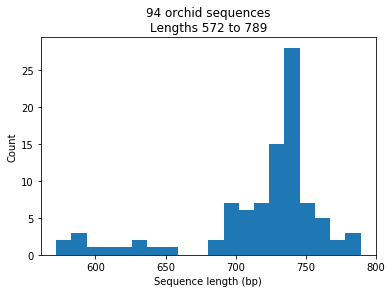

In [15]:
sizes = [len(rec) for rec in SeqIO.parse(StringIO(fastareadbytes.decode('utf-8')), "fasta")]

import pylab
pylab.hist(sizes, bins=20)
pylab.title("%i orchid sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()

Notice that most of these orchid sequences are about 740 bp long, and there could be two distinct classes of sequence here with a subset of shorter sequences.

Plot of sequence GC%

Another easily calculated quantity of a nucleotide sequence is the GC%. You might want to look at the GC% of all the genes in a bacterial genome for example, and investigate any outliers which could have been recently acquired by horizontal gene transfer. Again, for this example we’ll reuse our orchid FASTA file ls_orchid.fasta.

First of all, we will use Bio.SeqIO to parse the FASTA file and compile a list of all the GC percentages. 

In [16]:
from Bio.SeqUtils import GC

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse(StringIO(fastareadbytes.decode('utf-8')), "fasta"))

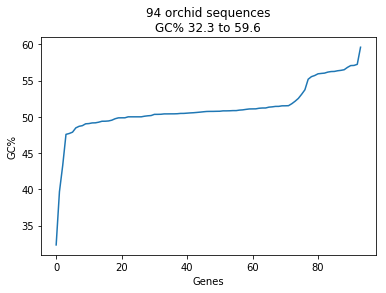

In [17]:
import pylab
pylab.plot(gc_values)
pylab.title("%i orchid sequences\nGC%% %0.1f to %0.1f" \
            % (len(gc_values),min(gc_values),max(gc_values)))
pylab.xlabel("Genes")
pylab.ylabel("GC%")
pylab.show()


In [25]:

record_iterator = SeqIO.parse(StringIO(fastareadbytes.decode('utf-8')), "fasta")
rec_one = next(record_iterator)
rec_two = next(record_iterator)
window = 7
seq_one = str(rec_one.seq).upper()
seq_two = str(rec_two.seq).upper()
data = [[(seq_one[i:i + window] != seq_two[j:j + window])
         for j in range(len(seq_one) - window)]
        for i in range(len(seq_two) - window)]

Nucleotide dot plots

 A dot plot is a way of visually comparing two nucleotide sequences for similarity to each other. A sliding window is used to compare short sub-sequences to each other, often with a mis-match threshold. Here for simplicity we’ll only look for perfect matches (shown in black in the plot below).

To start off, we’ll need two sequences. For the sake of argument, we’ll just take the first two from our orchid FASTA file ls_orchid.fasta.

In [26]:
window = 7
dict_one = {}
dict_two = {}
for (seq, section_dict) in [(str(rec_one.seq).upper(), dict_one),
                            (str(rec_two.seq).upper(), dict_two)]:
    for i in range(len(seq)-window):
        section = seq[i:i+window]
        try:
            section_dict[section].append(i)
        except KeyError:
            section_dict[section] = [i]
#Now find any sub-sequences found in both sequences
#(Python 2.3 would require slightly different code here)
matches = set(dict_one).intersection(dict_two)
print("%i unique matches" % len(matches))

244 unique matches


In [27]:
#Create lists of x and y co-ordinates for scatter plot
x = []
y = []
for section in matches:
    for i in dict_one[section]:
        for j in dict_two[section]:
            x.append(i)
            y.append(j)

we’ll compile dictionaries mapping the window sized sub-sequences to their locations, and then take the set intersection to find those sub-sequences found in both sequences. This uses more memory, but is much faster. Secondly, the pylab.imshow() function is limited in the size of matrix it can display. As an alternative, we’ll use the pylab.scatter() function.

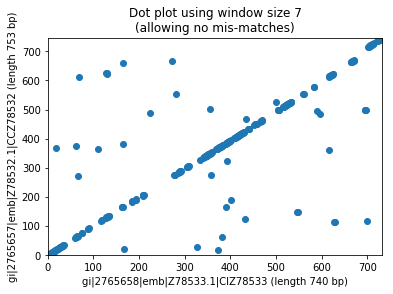

In [28]:
import pylab
pylab.cla() #clear any prior graph
pylab.gray()
pylab.scatter(x,y)
pylab.xlim(0, len(rec_one)-window)
pylab.ylim(0, len(rec_two)-window)
pylab.xlabel("%s (length %i bp)" % (rec_one.id, len(rec_one)))
pylab.ylabel("%s (length %i bp)" % (rec_two.id, len(rec_two)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()


GenomeDiagram

GenomeDiagram was designed for drawing whole genomes, in particular prokaryotic genomes, either as linear diagrams (optionally broken up into fragments to fit better) or as circular wheel diagrams. Have a look at Figure 2 in Toth et al. (2006) [3] for a good example. It proved also well suited to drawing quite detailed figures for smaller genomes such as phage, plasmids or mitochrondia, for example see Figures 1 and 2 in Van der Auwera et al. (2009) [4] (shown with additional manual editing).



pPCP1 plasmid from Yersinia pestis biovar Microtus, and the top down approach used in Section 17.1.3, but take advantage of the sigil options we’ve now discussed. This time we’ll use arrows for the genes, and overlay them with strand-less features (as plain boxes) showing the position of some restriction digest sites.

In [15]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_5 = client_6a0ba3944e2049c5a18c05adcdb36b67.get_object(Bucket='genomica-donotdelete-pr-i7p4mrbalfhwir', Key='NC_005816.gb')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_5, "__iter__"): streaming_body_5.__iter__ = types.MethodType( __iter__, streaming_body_5 ) 

peste = streaming_body_5.read()

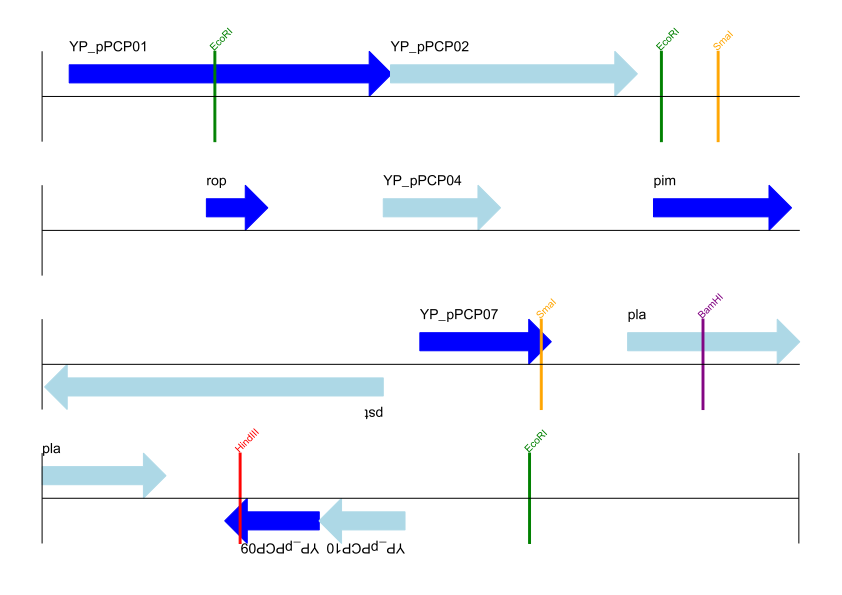

In [16]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation
from IPython.display import display, Image

record= SeqIO.read(StringIO(peste.decode('utf-8')), "genbank")
gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, sigil="ARROW",
                               color=color, label=True,
                               label_size = 14, label_angle=0)

#I want to include some strandless features, so for an example
#will use EcoRI recognition sites etc.
for site, name, color in [("GAATTC","EcoRI",colors.green),
                          ("CCCGGG","SmaI",colors.orange),
                          ("AAGCTT","HindIII",colors.red),
                          ("GGATCC","BamHI",colors.purple)]:
    index = 0
    while True:
        index  = record.seq.find(site, start=index)
        if index == -1 : break
        feature = SeqFeature(FeatureLocation(index, index+len(site)))
        gd_feature_set.add_feature(feature, color=color, name=name,
                                   label=True, label_size = 10,
                                   label_color=color)
        index += len(site)

#gd_diagram.draw(format="linear", pagesize='A4', fragments=4,start=0, end=len(record))
gd_diagram.draw(format="linear", pagesize='A4', fragments=4,
                start=0, end=len(record))

gd_diagram.write("plasmid_linear_nice.eps", "EPS")
gd_diagram.write("plasmid_linear_nice.svg", "SVG")
Image(gd_diagram.write_to_string("PNG"))



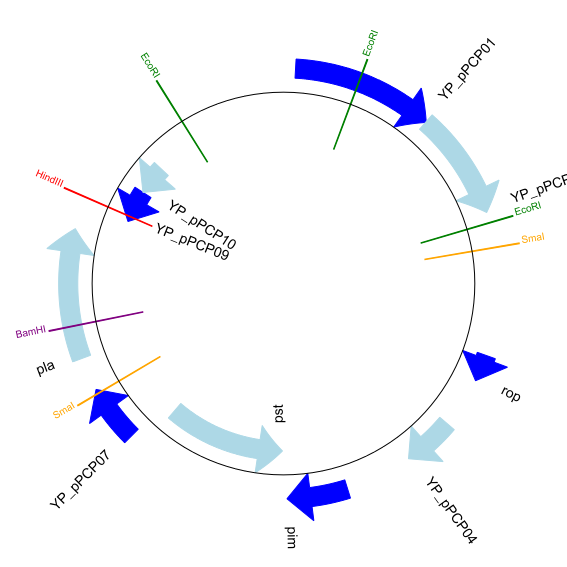

In [52]:
gd_diagram.draw(format="circular", circular=True, pagesize=(20*cm,20*cm),
                start=0, end=len(record), circle_core = 0.5)

gd_diagram.write("plasmid_circular_nice.pdf", "PDF")
gd_diagram.write("plasmid_circular_nice.eps", "EPS")
gd_diagram.write("plasmid_circular_nice.svg", "SVG")

Image(gd_diagram.write_to_string("PNG"))
